# Clustering Algorithm

## Creating a blob-shaped dataset

We usually visualize clusters as roundd blobs of scattered data points. This sort of shape is also known as a convex cluster and is one of the easiest shapes for algorithms to deal with

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y
})

## Visualizing our sample data

In [4]:
def plot_2d_clusters(x, y, ax):
    y_uniques = pd.Series(y).unique()
    for y_unique_item in y_uniques:
        x[y == y_unique_item].plot(title=f'{len(y_uniques)} Clusters',
             kind='scatter',
             x='x1', y='x2',
             marker=f'${y_unique_item}$',
             ax=ax)

In [5]:
import matplotlib.pyplot as plt

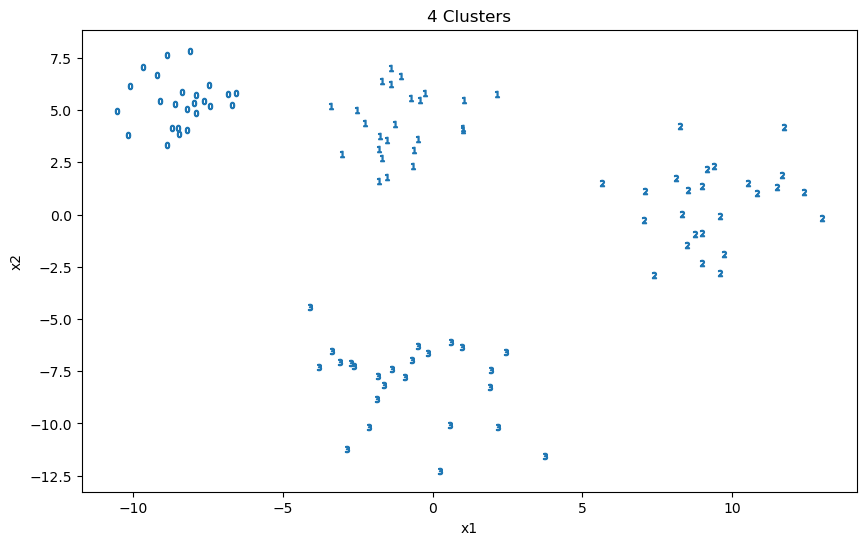

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_clusters(x, y, ax)

Each data point is marked according to its given label, we will pretend those labels haven't been given to us and see whether K-means algorithm will be able to predict them or not

## Clustering with K-means

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=5, random_state=7, n_init=10)
x, y = df_blobs[['x1', 'x2']], df_blobs['y']
y_pred = kmeans.fit_predict(x)

Text(0.5, 1.0, 'KMeans: 5 Clusters')

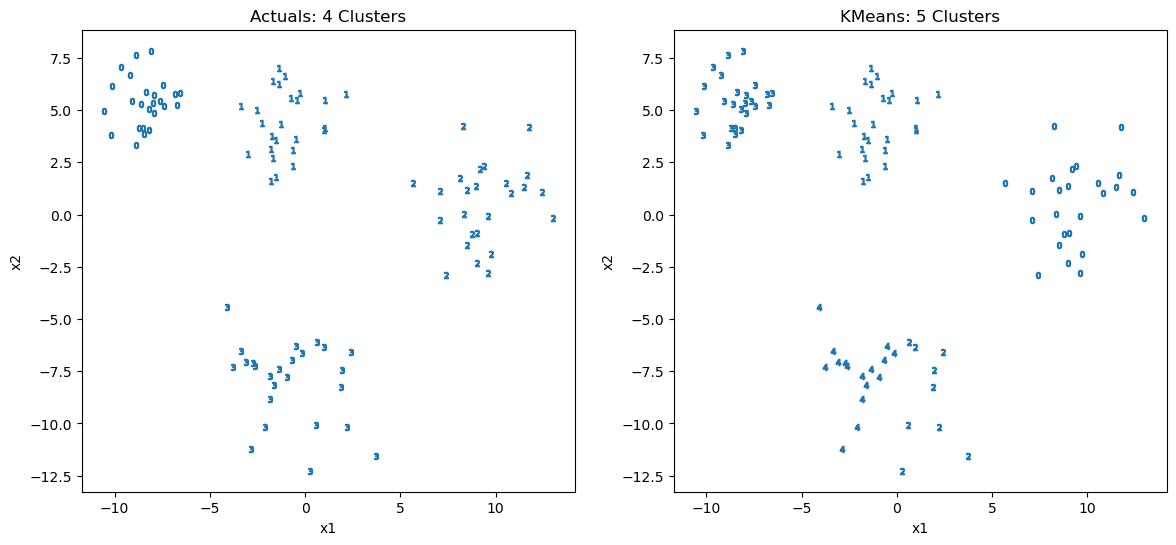

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_clusters(x, y, axs[0])
plot_2d_clusters(x, y_pred, axs[1])

axs[0].set_title(f'Actuals: {axs[0].get_title()}')
axs[1].set_title(f'KMeans: {axs[1].get_title()}')

One of the original four clusters have been split into two since we set K to five, Other than that, the prediction for the other clusters make sense. The labels that have been given to the clusters are arbitrary.

The change in labelling should not bother us at all as long as the clusters have the exact samemembers, This should not bother the clustering evaluation metrics either.

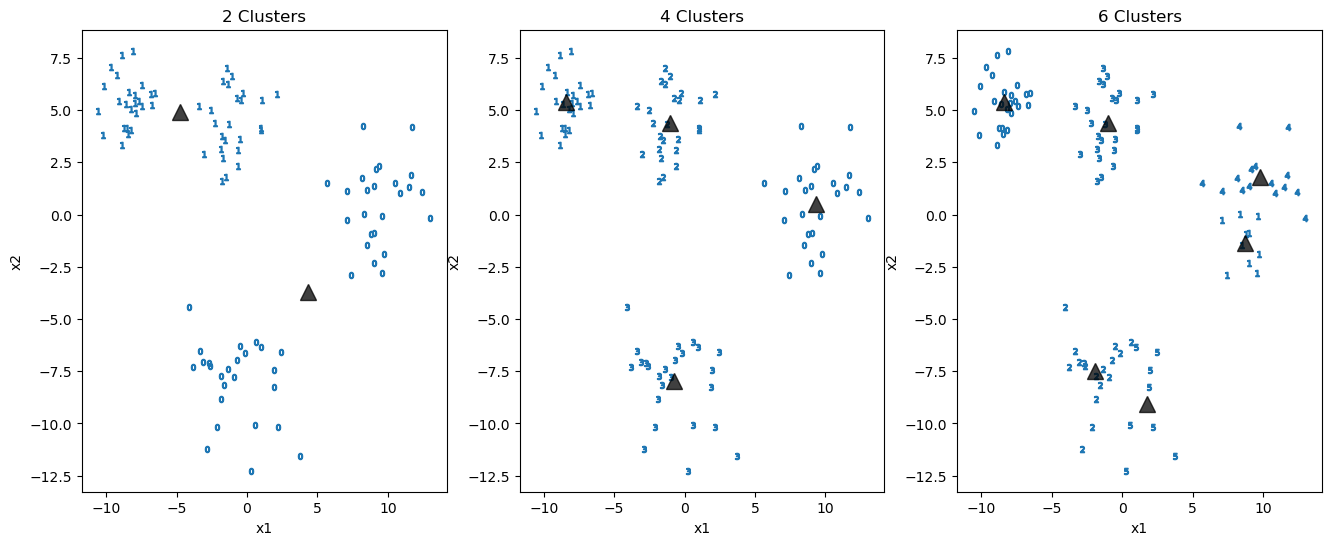

In [10]:
n_clusters_options = [2, 4, 6]

fig, axs = plt.subplots(1, len(n_clusters_options), figsize=(16, 6))

for i, n_clusters in enumerate(n_clusters_options):
    x, y = df_blobs[['x1', 'x2']], df_blobs['y']
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=7, n_init=10)
    y_pred = kmeans.fit_predict(x)
    plot_2d_clusters(x, y_pred, axs[i])
    axs[i].plot(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    'k^', ms=12, alpha=0.75)

### The silhouette score

The **silhouette score** is a measure of how similar a sample is to its own cluster compared to the amples in other clusters

Now, rather than performing a visual investigation of the clusters, we are going to loop over multiple values for `n_clusters` and store the **silhouette score** after each iteration 

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
n_clusters_options = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []

for i, n_clusters in enumerate(n_clusters_options):
    x, y = df_blobs[['x1', 'x2']], df_blobs['y']
    kmeans = KMeans(n_clusters=n_clusters, random_state=7, n_init=10)
    y_pred = kmeans.fit_predict(x)
    
    silhouette_scores.append(silhouette_score(x, y_pred))

We can just pick the n_clusters value that gives the best score. Here we put the calculated scores into a DatFrame and use a bar chart to compare them

<Axes: title={'center': 'KMeans: Silhouette Score vs # Clusters chosen'}, xlabel='n_clusters'>

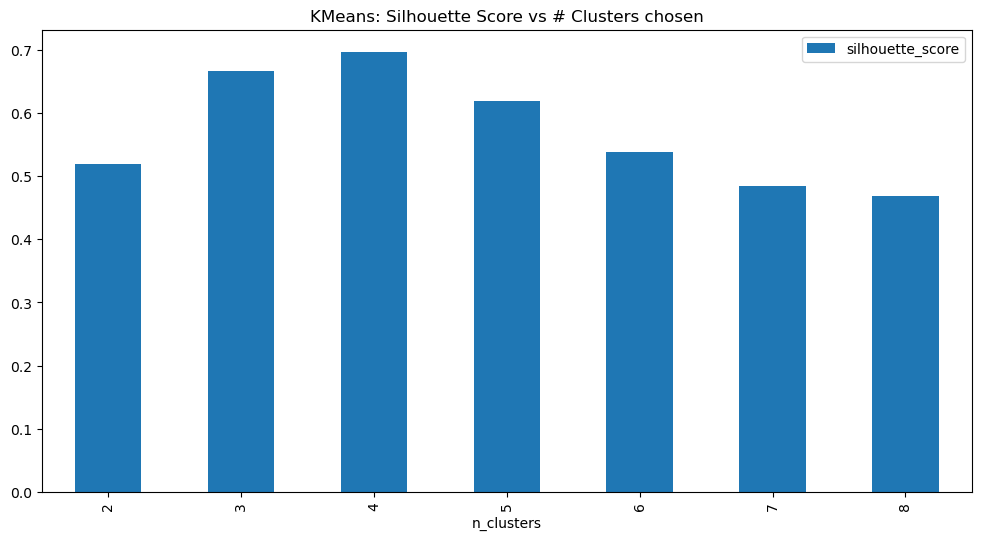

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)

pd.DataFrame({
    'n_clusters': n_clusters_options,
    'silhouette_score': silhouette_scores,
}).set_index('n_clusters').plot(title='KMeans: Silhouette Score vs # Clusters chosen',
                               kind='bar',
                               ax=ax)

### Choosing the initial centroids

by default, the K-means implementation of scikit-learn picks random initial centroids that are further apart from each other. It also tres multiple initial centroids and picks the one that gives the best results.

In [14]:
import numpy as np

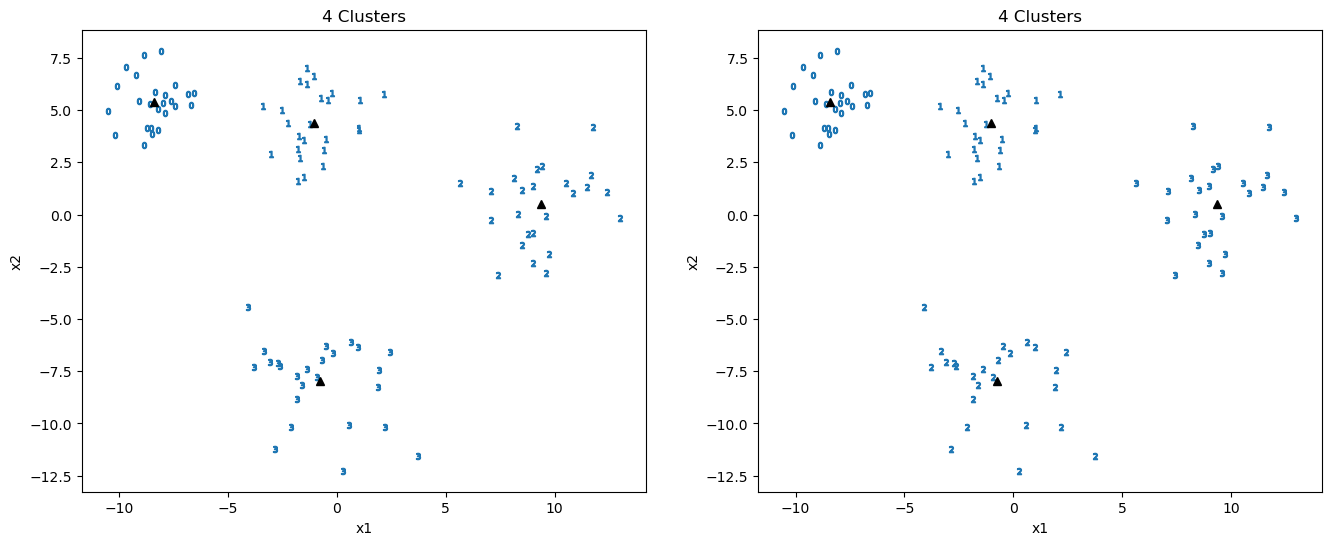

In [15]:
initial_centroid_options = np.array([
    [(-10,5), (0, 5), (10, 0), (-10, 0)],
    [(0,0), (0.1, 0.1), (0, 0), (0.1, 0.1)]
])

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for i, initial_centroids in enumerate(initial_centroid_options):
    x, y = df_blobs[['x1', 'x2']], df_blobs['y']
    kmeans = KMeans(init=initial_centroids, max_iter=500,
                    n_clusters=4, random_state=7, n_init=1)
    y_pred = kmeans.fit_predict(x)
    plot_2d_clusters(x, y_pred, axs[i])
    axs[i].plot(
        kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1], 'k^')